In [1]:
# Setting the PythonPath
import os

# # Get the parent directory of the current working directory
parent_dir = os.path.dirname(os.getcwd())

if "changed" not in locals():
    changed = False

if not changed:
    os.chdir(parent_dir)
    changed = True
print(os.getcwd())

%load_ext autoreload
%autoreload 2

/home/local/USHERBROOKE/aara2601/projects/shadow-quantum-kernels-gp


# Circuit construction

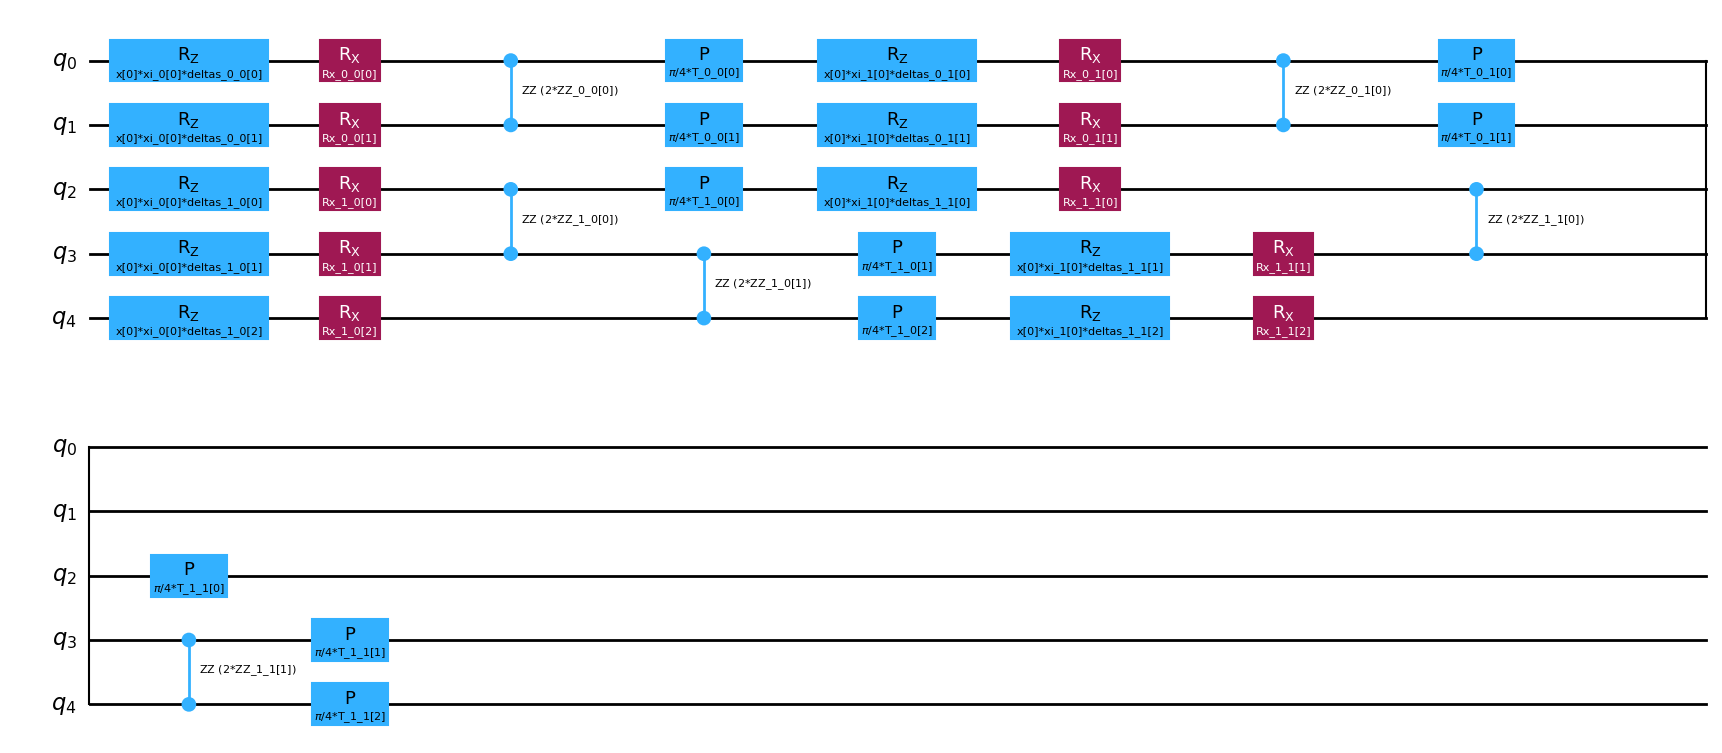

In [30]:
# example_usage.py

from src.circuits.configs import CircuitArchitecture, BlockSpec
from src.circuits.circuit_building import CircuitFactory

# 5 qubits, two blocks:
# Q_0 = (0, 1), edges E_0 = {(0,1)}
# Q_1 = (2, 3, 4), edges E_1 = {(2,3), (3,4)}
arch = CircuitArchitecture(
    num_qubits=5,
    blocks=(
        BlockSpec(qubits=(0, 1), edges=((0, 1),)),
        BlockSpec(qubits=(2, 3, 4), edges=((2, 3), (3, 4))),
    ),
    input_dim=1,   # ζ = 2, say x ∈ R^2
    num_layers=2,  # two successive data-injection layers
)

qc = CircuitFactory.createSQPcircuit(arch)

qc.draw("mpl")

In [19]:
qc.num_parameters

39

In [31]:
theta = 0.7
param_assignment = {p: 0.0 for p in qc.parameters}
# param_assignment["Rx_0_0"] = theta
# param_assignment

In [36]:
theta = 0.7
param_assignment = {p: 0.0 for p in qc.parameters}

for p in qc.parameters:
    if p.name == "Rx_0_0[0]":
        param_assignment[p] = theta

param_assignment

{ParameterVectorElement(Rx_0_0[0]): 0.7,
 ParameterVectorElement(Rx_0_0[1]): 0.0,
 ParameterVectorElement(Rx_0_1[0]): 0.0,
 ParameterVectorElement(Rx_0_1[1]): 0.0,
 ParameterVectorElement(Rx_1_0[0]): 0.0,
 ParameterVectorElement(Rx_1_0[1]): 0.0,
 ParameterVectorElement(Rx_1_0[2]): 0.0,
 ParameterVectorElement(Rx_1_1[0]): 0.0,
 ParameterVectorElement(Rx_1_1[1]): 0.0,
 ParameterVectorElement(Rx_1_1[2]): 0.0,
 ParameterVectorElement(T_0_0[0]): 0.0,
 ParameterVectorElement(T_0_0[1]): 0.0,
 ParameterVectorElement(T_0_1[0]): 0.0,
 ParameterVectorElement(T_0_1[1]): 0.0,
 ParameterVectorElement(T_1_0[0]): 0.0,
 ParameterVectorElement(T_1_0[1]): 0.0,
 ParameterVectorElement(T_1_0[2]): 0.0,
 ParameterVectorElement(T_1_1[0]): 0.0,
 ParameterVectorElement(T_1_1[1]): 0.0,
 ParameterVectorElement(T_1_1[2]): 0.0,
 ParameterVectorElement(ZZ_0_0[0]): 0.0,
 ParameterVectorElement(ZZ_0_1[0]): 0.0,
 ParameterVectorElement(ZZ_1_0[0]): 0.0,
 ParameterVectorElement(ZZ_1_0[1]): 0.0,
 ParameterVectorElement(ZZ

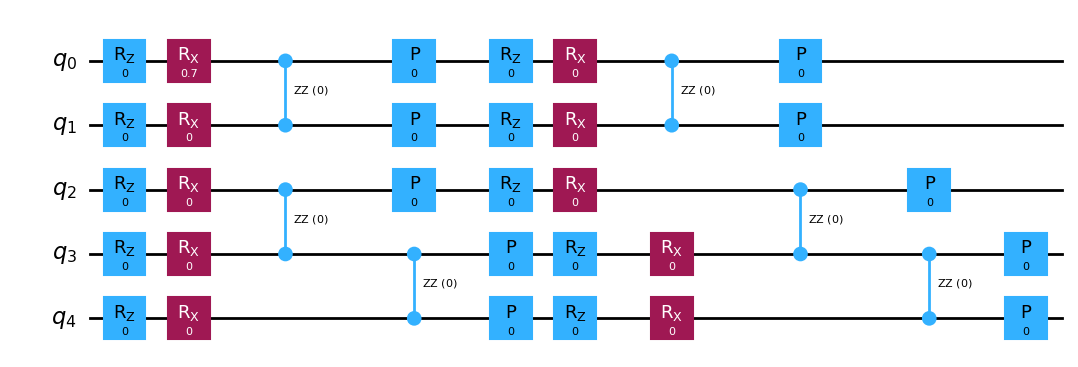

In [37]:
qc_assigned = qc.assign_parameters(param_assignment)
qc_assigned.draw("mpl")

In [51]:
from qiskit.quantum_info import Statevector, SparsePauliOp
state = Statevector.from_instruction(qc_assigned)

op = SparsePauliOp.from_list([("IIIIZ", 1.0)])  # Z on qubit 0
expect_qc = state.expectation_value(op).real

expect_theory = math.cos(theta)
expect_qc, expect_theory

(np.float64(0.7648421872844884), 0.7648421872844885)